## EDA

### Carga de datos

In [1]:
# Carga de datos con pandas

import pandas as pd

table_01 = pd.read_csv('..//data//raw//dataset_sample_1.csv')
table_02 = pd.read_csv('..//data//raw//dataset_sample_2.csv')

table_01.head()

,UUID_CLIENTE_CONSUMIDOR,PEDIDO,FECHA_SOLUCION,COD_PRODUCTO,CATEGORIA,UNIDADES_BRUTAS,VENTA_BRUTA_CON_IVA
0,5F333C92C61098CC840A180313615250,39562883,2023-09-28,26605,Jabones,1,10043.0
1,323C3C3B1404F866097F000001615250,39758414,2023-10-14,28308,Cuidado Capilar F,1,23859.0
2,6C2FA988251C4F35BD0A180313615250,39107912,2023-08-23,23610,Carnes Frias,1,20152.0
3,37908B3B6309B1549E7F000001615250,39197173,2023-08-30,18460,Cuidado Capilar F,1,21500.0
4,85C5EF6E09B085614D0A180327615250,36658943,2023-01-18,28485,Cuidado Oral,1,10100.0


In [2]:
table_02.head()

,UUID_CLIENTE_CONSUMIDOR,DEPARTAMENTO,CIUDAD,GENERO_DIM_CLIENTE,FECHANACIMIENTO_DIM_CLIENTE
0,5F333C92C61098CC840A180313615250,ANTIOQUIA,MEDELLÍN,F,1984-05-03T00:00:00Z
1,323C3C3B1404F866097F000001615250,VALLE DEL CAUCA,CALI,F,1972-12-26T00:00:00Z
2,6C2FA988251C4F35BD0A180313615250,VALLE DEL CAUCA,CALI,F,1991-11-18T00:00:00Z
3,37908B3B6309B1549E7F000001615250,NORTE DE SANTANDER,PAMPLONA,F,1983-07-16T00:00:00Z
4,85C5EF6E09B085614D0A180327615250,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",NaN,NaN


### Análisis básica de variables

In [3]:
# Tipos de datos en la base de datos
table_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231000 entries, 0 to 230999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   UUID_CLIENTE_CONSUMIDOR  231000 non-null  object 
 1   PEDIDO                   231000 non-null  int64  
 2   FECHA_SOLUCION           231000 non-null  object 
 3   COD_PRODUCTO             231000 non-null  int64  
 4   CATEGORIA                229958 non-null  object 
 5   UNIDADES_BRUTAS          231000 non-null  int64  
 6   VENTA_BRUTA_CON_IVA      231000 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 12.3+ MB


In [5]:
table_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231000 entries, 0 to 230999
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   UUID_CLIENTE_CONSUMIDOR      231000 non-null  object
 1   DEPARTAMENTO                 230929 non-null  object
 2   CIUDAD                       230929 non-null  object
 3   GENERO_DIM_CLIENTE           197022 non-null  object
 4   FECHANACIMIENTO_DIM_CLIENTE  201559 non-null  object
dtypes: object(5)
memory usage: 8.8+ MB


1. Tipos de datos inconsistentes unicamente para las fechas que estan en tipo objetct y no en datetime
2. 231.000 registros totales detectados en ambos datasets

### Análisis básico consistencia en los datos

In [6]:
table_01.describe()

,PEDIDO,COD_PRODUCTO,UNIDADES_BRUTAS,VENTA_BRUTA_CON_IVA
count,2.310000e+05,231000.000000,231000.000000,2.310000e+05
mean,3.843592e+07,42026.958758,2.189221,2.685284e+04
std,1.090720e+06,32698.940138,28.024392,1.831105e+05
min,3.625621e+07,2.000000,0.000000,0.000000e+00
25%,3.752120e+07,23518.000000,1.000000,1.023466e+04
50%,3.854015e+07,30491.000000,1.000000,1.503000e+04
75%,3.936598e+07,93252.000000,2.000000,2.392000e+04
max,4.012728e+07,342421.000000,4800.000000,2.095200e+07


* No hay valores nulos en las variables numéricas.
* Número mínimo de unidades brutas: 0 unidades
* Número máximo de unidades brutas: 4.800 unidades
* Número medio de unidades brutas: ~2.18 unidades
---
A partir de esta información, puedo inferir que no existen valores inconsistentes en la variable unidades brutas, como valores negativos. Sin embargo, analizando el valor máximo de unidades brutas en 4.800 vs la media, una hipótesis, es que este valor puede ser un outlier

In [11]:
print("Fecha Minima", min(pd.to_datetime(table_01["FECHA_SOLUCION"])))
print("Fecha Máxima", max(pd.to_datetime(table_01["FECHA_SOLUCION"])))

Fecha Minima 2022-12-01 00:00:00
Fecha Máxima 2023-11-16 00:00:00


* Datos normales dentro del rango de fechas.

In [15]:
print("Clientes únicos dataset1: ", table_01["UUID_CLIENTE_CONSUMIDOR"].nunique())
print("Clientes únicos dataset2: ", table_02["UUID_CLIENTE_CONSUMIDOR"].nunique())
print("Peidos únicos dataset1: ", table_01["PEDIDO"].nunique())

Clientes únicos dataset1:  37570
Clientes únicos dataset2:  37570
Peidos únicos dataset1:  85818


In [16]:
table_01.isnull().sum()

UUID_CLIENTE_CONSUMIDOR       0
PEDIDO                        0
FECHA_SOLUCION                0
COD_PRODUCTO                  0
CATEGORIA                  1042
UNIDADES_BRUTAS               0
VENTA_BRUTA_CON_IVA           0
dtype: int64

In [17]:
table_02.isnull().sum()

UUID_CLIENTE_CONSUMIDOR            0
DEPARTAMENTO                      71
CIUDAD                            71
GENERO_DIM_CLIENTE             33978
FECHANACIMIENTO_DIM_CLIENTE    29441
dtype: int64

* Valores nulos en la variable CATEGORIA del dataset1
* Valores nulos en todas las variables del dataset2 a excepción de UUID_CLIENTE_CONSUMIDOR
* Se tendria que hacer un entendimiento de por qué esos valores nulos, si fue error del sistema de adquicisión de datos, si realmente deberian ser nulos etc. de acuerdo con este análisis se tomará un desición de si se imputan datos, se remueven esos valores etc.

In [28]:
print(table_01.duplicated(subset=table_01.columns).sum())
print(table_02.duplicated(subset=table_02.columns).sum())

78
191697


* Se detectaron 78 valores duplicados en el dataset1. Se debe hacer un entendimiento de esos valores duplicados, si realmente es un error del sistema y puede ser que usuarios hicieron compras en la misma fecha y hora por ejemplo.
* Se detectaron 191.697 valores duplicados en el dataset2. Para este dataset2, no hay problema en tener valores duplicados, pues son datos personales de los clientes por cada compra.

### Análisis descriptivos básicos

In [ ]:
print("Principales categorías consumidas por transacción")
table_01["CATEGORIA"].value_counts().head(10)

Principales categorías consumidas


CATEGORIA
Galletas                            30266
Bebidas Para Preparar               22929
Golosinas                           14438
Hogar                               11843
Cuidado Capilar F                   11038
Maquillaje                           8953
Snacks Y Frutos Secos                8791
Carnes Frias                         7629
Aseo Del Hogar                       6495
Alimentos Larga Vida Y Conservas     6363
Name: count, dtype: int64

In [ ]:
percents = round(((table_01["CATEGORIA"].value_counts().head(10)) / len(table_01) ) * 100, 2)
print("Porcentajes de cada producto respecto al total de transacciones")
percents

Principales categorías consumidas
Porcentajes de cada producto


CATEGORIA
Galletas                            13.10
Bebidas Para Preparar                9.93
Golosinas                            6.25
Hogar                                5.13
Cuidado Capilar F                    4.78
Maquillaje                           3.88
Snacks Y Frutos Secos                3.81
Carnes Frias                         3.30
Aseo Del Hogar                       2.81
Alimentos Larga Vida Y Conservas     2.75
Name: count, dtype: float64

* Galletas, el producto más comprado en términos de frecuencia

In [54]:
table_01.groupby("CATEGORIA")["UNIDADES_BRUTAS"].sum().sort_values(ascending=False).head(10)

CATEGORIA
Bebidas Para Preparar               128346
Galletas                             92440
Golosinas                            32810
Cuidado Capilar F                    28231
Alimentos Larga Vida Y Conservas     17766
Snacks Y Frutos Secos                13911
Hogar                                13647
Pastas                               12313
Carnes Frias                         10653
Desodorantes                          9912
Name: UNIDADES_BRUTAS, dtype: int64

* Categorias más consumidas por número de unidades:
    * Bebidas Para Preparar: 128.346 unidades
    * Galletas: 92.440 unidades
    * Golosinas: 32.810

In [61]:
table_01.groupby("CATEGORIA")["VENTA_BRUTA_CON_IVA"].sum().sort_values(ascending=False).head(10).map('{:,.0f}'.format)

CATEGORIA
Bebidas Para Preparar                 1,056,818,369
Galletas                                666,575,177
Cuidado Capilar F                       414,284,179
Golosinas                               393,618,984
Hogar                                   307,033,122
Cuidado Capilar P                       224,821,747
Cuidado Corporal F                      199,940,053
Cuidado Facial P                        186,039,932
Carnes Frias                            158,835,017
Vitaminas, Minerales Y Suplementos      131,224,263
Name: VENTA_BRUTA_CON_IVA, dtype: object

* Top categorias en términos de dinero:
    * Bebidas Para Preparar: 1,056,818,369 pesos/usd
    * Galletas: 666,575,177 pesos/usd
    * Cuidado Capilar F: 414,284,179 pesos/usd

In [64]:
table_02.columns

Index(['UUID_CLIENTE_CONSUMIDOR', 'DEPARTAMENTO', 'CIUDAD',
       'GENERO_DIM_CLIENTE', 'FECHANACIMIENTO_DIM_CLIENTE'],
      dtype='object')

In [ ]:
# asumiento que las transacciones de dataset1 y dataset2 son las misma

print("Ciudades donde se hacen más transacciones")
table_02["CIUDAD"].value_counts().head(10)

Ciudades donde se hacen más transacciones


CIUDAD
BOGOTÁ, D.C.          59893
MEDELLÍN              35664
CALI                  21569
BELLO                  9188
BARRANQUILLA           6111
CARTAGENA              5754
SOACHA                 4918
ITAGÜÍ                 4235
ENVIGADO               3906
SAN JOSÉ DE CÚCUTA     3255
Name: count, dtype: int64

In [66]:
percents = round(((table_02["CIUDAD"].value_counts().head(10)) / len(table_02) ) * 100, 2)
print("Porcentaje de transacciones que representa cada ciudad del total de transacciones")
percents

Porcentaje de transacciones que representa cada ciudad del total de transacciones


CIUDAD
BOGOTÁ, D.C.          25.93
MEDELLÍN              15.44
CALI                   9.34
BELLO                  3.98
BARRANQUILLA           2.65
CARTAGENA              2.49
SOACHA                 2.13
ITAGÜÍ                 1.83
ENVIGADO               1.69
SAN JOSÉ DE CÚCUTA     1.41
Name: count, dtype: float64

* Bogota, Medellín y Cali, representan el 50% de las transacciones del comercio

In [67]:
print("Departamento donde se hacen más transacciones")
table_02["DEPARTAMENTO"].value_counts().head(10)

Departamento donde se hacen más transacciones


DEPARTAMENTO
ANTIOQUIA             64324
BOGOTÁ, D.C.          59892
VALLE DEL CAUCA       27445
CUNDINAMARCA          13015
ATLÁNTICO             11120
SANTANDER              7659
BOLÍVAR                6399
NORTE DE SANTANDER     5985
META                   4495
TOLIMA                 3824
Name: count, dtype: int64

* Antioquia es el departamento que más transacciones hizo en ese año

In [68]:
print("Departamento donde se hacen más transacciones")
table_02["GENERO_DIM_CLIENTE"].value_counts().head(10)

Departamento donde se hacen más transacciones


GENERO_DIM_CLIENTE
F    177277
M     19745
Name: count, dtype: int64

In [69]:
percents = round(((table_02["GENERO_DIM_CLIENTE"].value_counts().head(10)) / len(table_02) ) * 100, 2)
print("Porcentaje de transacciones que representa cada ciudad del total de transacciones")
percents

Porcentaje de transacciones que representa cada ciudad del total de transacciones


GENERO_DIM_CLIENTE
F    76.74
M     8.55
Name: count, dtype: float64

* Las mujeres son las que más transacciones hacen

### Análisis gráficos básicos

In [70]:
table_01.columns

Index(['UUID_CLIENTE_CONSUMIDOR', 'PEDIDO', 'FECHA_SOLUCION', 'COD_PRODUCTO',
       'CATEGORIA', 'UNIDADES_BRUTAS', 'VENTA_BRUTA_CON_IVA'],
      dtype='object')

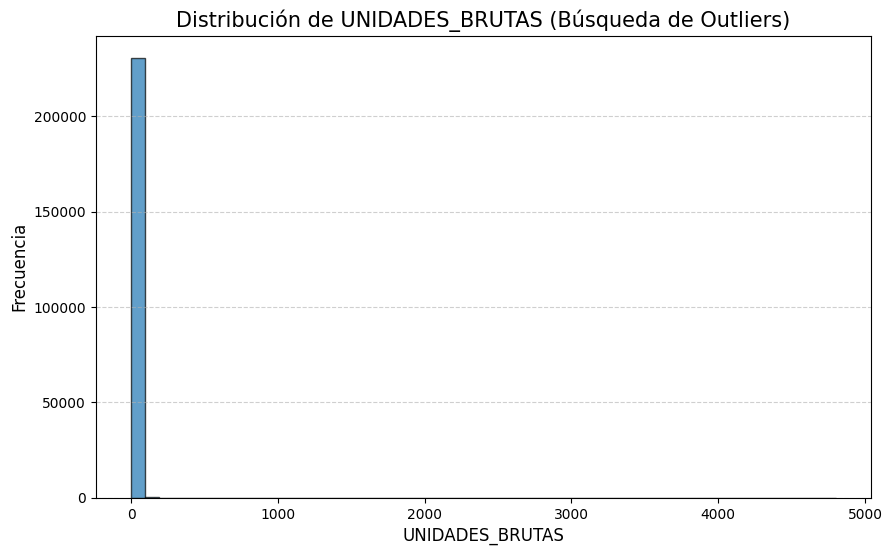

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Usamos un gran número de bins para ver mejor la distribución
plt.hist(table_01['UNIDADES_BRUTAS'], bins=50, edgecolor='black', alpha=0.7)

plt.title('Distribución de UNIDADES_BRUTAS (Búsqueda de Outliers)', fontsize=15)
plt.xlabel('UNIDADES_BRUTAS', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

* aparentemente hay un oulier en las ~4.800 unidades que se vio en el analisis descriptivo anterior. Voy a validar esta informacion con un boxplot

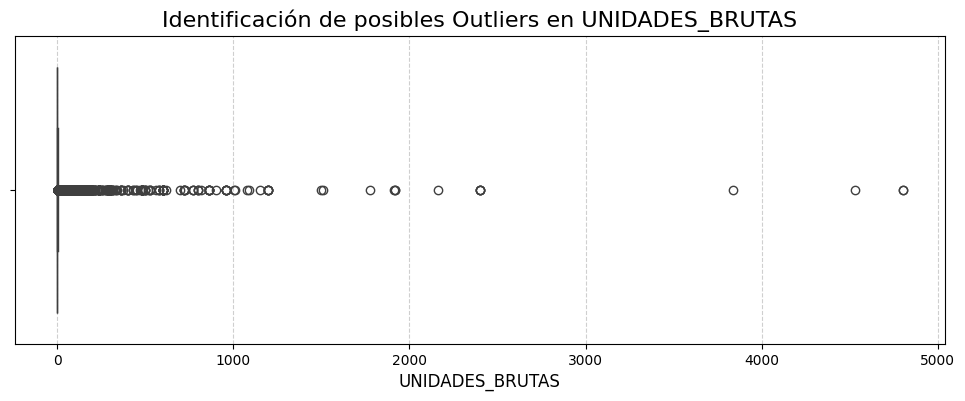

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 4))
# Usamos un Box Plot horizontal (orientación 'h')
# El argumento 'x' es la variable a analizar
sns.boxplot(x=table_01['UNIDADES_BRUTAS'], orient='h')

plt.title('Identificación de posibles Outliers en UNIDADES_BRUTAS', fontsize=16)
plt.xlabel('UNIDADES_BRUTAS', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

* Se tendria que entender con el área encargada como entender estos datos anormales o fuera de grandes rangos.

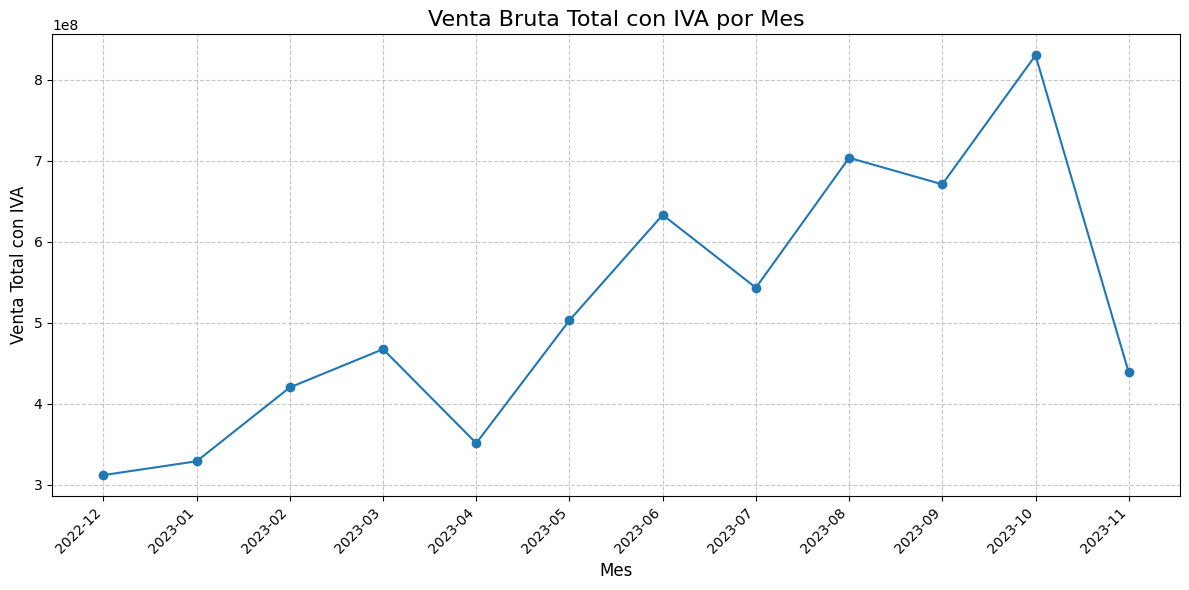

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Asegurarse de que la columna de fecha esté en formato datetime
table_01['FECHA_SOLUCION'] = pd.to_datetime(table_01['FECHA_SOLUCION'])

# 2. Establecer la columna de fecha como índice para facilitar el análisis temporal
df_indexed = table_01.set_index('FECHA_SOLUCION')

# 3. Agrupar por mes y sumar la venta bruta
# El método 'resample("M")' agrupa por fin de mes ('M') y luego .sum() totaliza el monto.
df_monthly_transactions = df_indexed['VENTA_BRUTA_CON_IVA'].resample('ME').sum()

# 4. Crear una columna de etiqueta 'Año-Mes'
df_monthly_transactions.index = df_monthly_transactions.index.strftime('%Y-%m')

plt.figure(figsize=(12, 6))
plt.plot(
    df_monthly_transactions.index,
    df_monthly_transactions.values,
    marker='o', linestyle='-', color='#1f77b4'  # Color azul estándar de Matplotlib
)

plt.title("Venta Bruta Total con IVA por Mes", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Venta Total con IVA", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

* Mes que más dinero entró a la compañia: octubre de 2023
* Mes que menos dinero entró a la compañia: diciembre de 2022

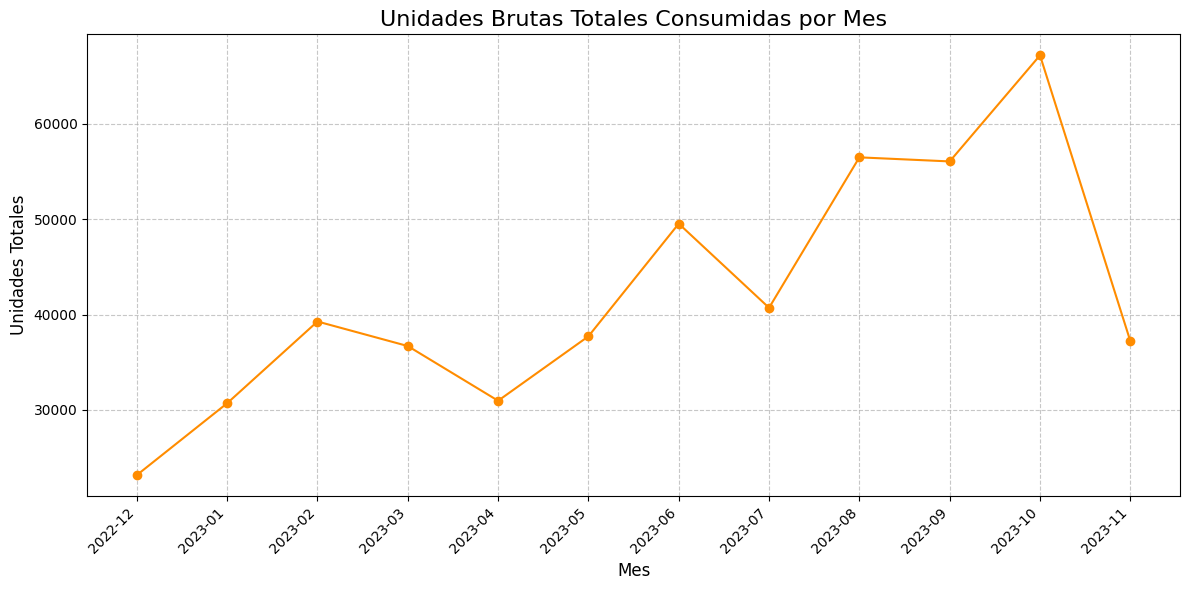

In [9]:
# 3. Agrupar por mes y sumar las UNIDADES_BRUTAS
# El método 'resample("M")' agrupa por fin de mes y luego .sum() totaliza las unidades.
df_monthly_units = df_indexed['UNIDADES_BRUTAS'].resample('ME').sum()

# 4. Crear una columna de etiqueta 'Año-Mes' para el gráfico
df_monthly_units.index = df_monthly_units.index.strftime('%Y-%m')

plt.figure(figsize=(12, 6))
plt.plot(
    df_monthly_units.index,
    df_monthly_units.values,
    marker='o', linestyle='-', color='darkorange' # Cambiamos el color para diferenciarlo
)

plt.title("Unidades Brutas Totales Consumidas por Mes", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Unidades Totales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* Sigue mismo patron que las ventas totales en terminos de dinero

### Análisis descriptivos detallados

In [22]:
print("Venta Promedio por Categoría (Top 10)")
# Agrupa, calcula el promedio, ordena y formatea para fácil lectura
venta_promedio = table_01.groupby("CATEGORIA")["VENTA_BRUTA_CON_IVA"].mean().sort_values(ascending=False).head(10)

# Formatear el resultado (usando notación de moneda si es apropiado)
print(venta_promedio.map('${:,.0f}'.format))


Venta Promedio por Categoría (Top 10)
CATEGORIA
Alimentos                                   $713,220
Electrodomésticos                           $178,660
Electromenores                              $176,094
Fajas Y Prendas De Control                   $90,021
Premios                                      $89,659
Colonias                                     $88,610
Hogar P                                      $80,687
Hogar Premios                                $74,895
Enterizos, conjuntos y vestidos infantil     $63,972
Prenda inferior infantil                     $54,036
Name: VENTA_BRUTA_CON_IVA, dtype: object


In [ ]:
# clientes más activos
print("\nTop 5 Clientes por Frecuencia de Pedidos:")
# Cuenta cuántas veces aparece cada cliente en la columna de pedidos
clientes_frecuentes = table_01.groupby('UUID_CLIENTE_CONSUMIDOR')['PEDIDO'].nunique().sort_values(ascending=False).head(5)
print(clientes_frecuentes)


Top 5 Clientes por Frecuencia de Pedidos:
UUID_CLIENTE_CONSUMIDOR
899E06B26BFA75DA5D0A180327615250    922
7B607AE9057FD15F050A180326615250    537
87C86BDD503A79F1FD0A180326615250    358
87E88AC459A59CC6940A180326615250    152
87C88198398E86258B0A180327615250    117
Name: PEDIDO, dtype: int64


In [26]:
# Clientes por Impacto Económico (Valor)

print("Top 5 Clientes por Gasto Total (Mayor VENTA_BRUTA_CON_IVA)")
# Agrupa por cliente y suma la venta total
gasto_por_cliente = table_01.groupby('UUID_CLIENTE_CONSUMIDOR')['VENTA_BRUTA_CON_IVA'].sum().sort_values(ascending=False).head(5)

# Formatear el resultado para mejor lectura
print(gasto_por_cliente.map('${:,.0f}'.format))

Top 5 Clientes por Gasto Total (Mayor VENTA_BRUTA_CON_IVA)
UUID_CLIENTE_CONSUMIDOR
6D3DBBA7773C53DB940A180313615250    $214,240,453
6D99A033892AC1247C0A180313615250     $83,713,536
86E6AA2CA6A73AFE1F0A180327615250     $47,062,600
6E673544E1186E37020A180313615250     $36,668,132
79B4E08339BEE1A4680A180327615250     $35,511,483
Name: VENTA_BRUTA_CON_IVA, dtype: object


In [ ]:
# Elimina duplicados, manteniendo la primera aparición de cada cliente
table_02_unique = table_02.drop_duplicates(subset=['UUID_CLIENTE_CONSUMIDOR'], keep='first')

# Merge con la tabla de clientes únicos:
df_merged = pd.merge(
    table_01,
    table_02_unique,
    on='UUID_CLIENTE_CONSUMIDOR',
    how='left'
)
# El resultado debería ser muy cercano a len(table_01)
print(f"Filas: {len(df_merged)}")

Filas después de corregir el merge: 231000


In [35]:
ventas_por_ciudad = df_merged.groupby('CIUDAD')['VENTA_BRUTA_CON_IVA'].sum().sort_values(ascending=False).head(5)
    
# Formateo (usando el formato que definimos antes)
print(ventas_por_ciudad.map('${:,.0f}'.format))

CIUDAD
BOGOTÁ, D.C.          $1,381,264,788
MEDELLÍN              $1,030,134,775
SAN JOSÉ DE CÚCUTA      $672,621,425
CALI                    $486,973,470
BELLO                   $233,954,209
Name: VENTA_BRUTA_CON_IVA, dtype: object


In [37]:
print("Venta Promedio por Transacción por Género:")

# Agrupa por GENERO y calcula la media de VENTA_BRUTA_CON_IVA
venta_promedio_genero = df_merged.groupby('GENERO_DIM_CLIENTE')['VENTA_BRUTA_CON_IVA'].mean().sort_values(ascending=False)

# Formato de moneda
print(venta_promedio_genero.map('${:,.0f}'.format))

Venta Promedio por Transacción por Género:
GENERO_DIM_CLIENTE
M    $47,446
F    $25,123
Name: VENTA_BRUTA_CON_IVA, dtype: object


In [ ]:
genero_foco = 'F'

print(f"\nTop 5 Categorías más Consumidas por {genero_foco} (por Unidades):")

# 1. Filtra por el género
df_genero = df_merged[df_merged['GENERO_DIM_CLIENTE'] == genero_foco]

# 2. Agrupa por CATEGORIA y suma las unidades
top_categorias_genero = df_genero.groupby('CATEGORIA')['UNIDADES_BRUTAS'].sum().sort_values(ascending=False).head(5)

print(top_categorias_genero.round(0))


Top 5 Categorías más Consumidas por F (por Unidades):
CATEGORIA
Galletas                            71902
Bebidas Para Preparar               64580
Golosinas                           22804
Cuidado Capilar F                   16748
Alimentos Larga Vida Y Conservas    13720
Name: UNIDADES_BRUTAS, dtype: int64


In [ ]:
genero_foco = 'M'

print(f"\nTop 5 Categorías más Consumidas por {genero_foco} (por Unidades):")

# 1. Filtra por el género
df_genero = df_merged[df_merged['GENERO_DIM_CLIENTE'] == genero_foco]

# 2. Agrupa por CATEGORIA y suma las unidades
top_categorias_genero = df_genero.groupby('CATEGORIA')['UNIDADES_BRUTAS'].sum().sort_values(ascending=False).head(5)

print(top_categorias_genero.round(0))


Top 5 Categorías más Consumidas por M (por Unidades):
CATEGORIA
Bebidas Para Preparar    56327
Galletas                 10509
Cuidado Capilar F         9941
Golosinas                 7071
Pastas                    2168
Name: UNIDADES_BRUTAS, dtype: int64
